## Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
  1. satisfaction_level - Уровень удовлетворенности работой
  2. Last_evaluation - Время с момента последней оценки в годах
  3. number_projects - Количество проектов, выполненных за время работы
  4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
  5. time_spend_company - Стаж работы в компании в годах
  6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
  7. left - уволился ли сотрудник
  8. promotion_last_5years - повышался ли сотрудник за последние пять лет
  9. department - отдел в котором работает сотрудник
  10. salary - относительный уровень зарплаты

In [58]:
# Загружаем необходимые библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

In [59]:
# Загружаем данные из csv-таблицы в переменную hr:
hr = pd.read_csv('HR.csv', sep = ',')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Рассчитаем основные статистики для переменных:
среднее, медиана, мода, мин/макс, сред.отклонение.

In [60]:
# Видим, что пропуски в данных отсутствуют, тип данных не требует изменений
hr.info()
hr.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [5]:
# Рассчитаем основные статистики для всех переменных с помощью метода describe()
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Посчитаем базовые математические функции для каждой количественной переменной
# Сгруппируем данные по 'left' (уволился ли сотрудник)

agg_func_math_sl = {
    'satisfaction_level': ['mean', 'median', 'min', 'max', 'std']
}
hr.groupby(['left']).agg(agg_func_math_sl).round(2)

satisfaction_level                         
                   mean median   min   max   std
left                                            
0                  0.67   0.69  0.12  1.00  0.22
1                  0.44   0.41  0.09  0.92  0.26

In [7]:
agg_func_math_le = {
    'last_evaluation': ['mean', 'median', 'min', 'max', 'std']
}
hr.groupby(['left']).agg(agg_func_math_le).round(2)

last_evaluation                        
                mean median   min  max   std
left                                        
0               0.72   0.71  0.36  1.0  0.16
1               0.72   0.79  0.45  1.0  0.20

In [8]:
agg_func_math_np = {
    'number_project': ['mean', 'median', 'min', 'max', 'std']
}
hr.groupby(['left']).agg(agg_func_math_np).round(2)

number_project                     
               mean median min max   std
left                                    
0              3.79    4.0   2   6  0.98
1              3.86    4.0   2   7  1.82

In [9]:
agg_func_math_amh = {
    'average_montly_hours': ['mean', 'median', 'min', 'max', 'std']
}
hr.groupby(['left']).agg(agg_func_math_amh).round(2)

average_montly_hours                        
                     mean median  min  max    std
left                                             
0                  199.06  198.0   96  287  45.68
1                  207.42  224.0  126  310  61.20

In [10]:
agg_func_math_tsc = {
    'time_spend_company': ['mean', 'median', 'min', 'max', 'std']
}
hr.groupby(['left']).agg(agg_func_math_tsc).round(2)

time_spend_company                     
                   mean median min max   std
left                                        
0                  3.38    3.0   2  10  1.56
1                  3.88    4.0   2   6  0.98

In [11]:
# Рассчитаем моду для всех переменных

hr.mode().head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [12]:
# Сгруппируем данные по уволившимся сотрудникам

grouped_modes = hr.groupby('left').agg(lambda x: x.mode().iloc[0])
grouped_modes

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
left,,,,,,,,,
0,0.5,0.74,3,224,3,0,0,sales,low
1,0.1,1.00,2,135,3,0,0,sales,low


## Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.

Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [13]:
# Создадим корреляционную матрицу

df = hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
df.corr().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101
last_evaluation,0.105,1.000,0.349,0.340,0.132
number_project,-0.143,0.349,1.000,0.417,0.197
average_montly_hours,-0.020,0.340,0.417,1.000,0.128
time_spend_company,-0.101,0.132,0.197,0.128,1.000


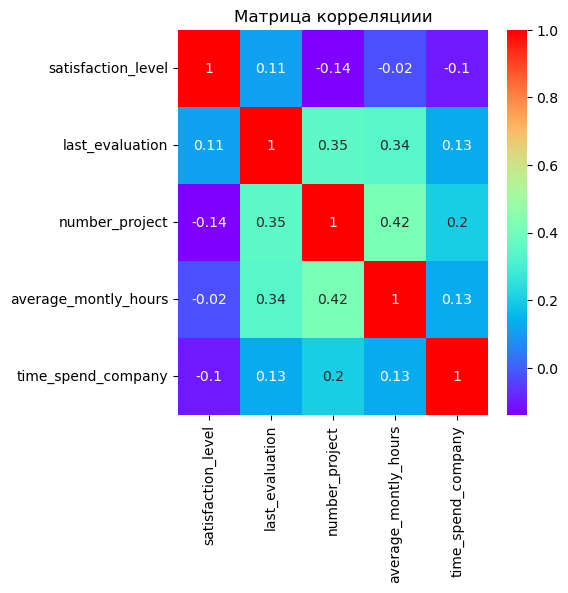

In [14]:
# Визуализируем корреляционную матрицу

plt.figure(figsize=(5, 5))
sns.heatmap(df.corr().round(2), annot=True, cbar= True, cmap='rainbow')
plt.title('Матрица корреляциии')
plt.show()

Самые скоррелированные переменные 'number_project' и 'average_montly_hours'.
Наблюдается корреляция 0.42, однако само значение коэффициента менее 0.5, что говорит о слабой положительной корреляции между переменными.

Наименее скоррелированные переменные 'satisfaction_level' и 'average_montly_hours'.
Наблюдается корреляция -0.02, значение приближено к нулю, что говорит об очень слабой отрицательной корреляции между переменными, либо переменные не связаны между собой.

## Рассчитаем сколько сотрудников работает в каждом департаменте

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


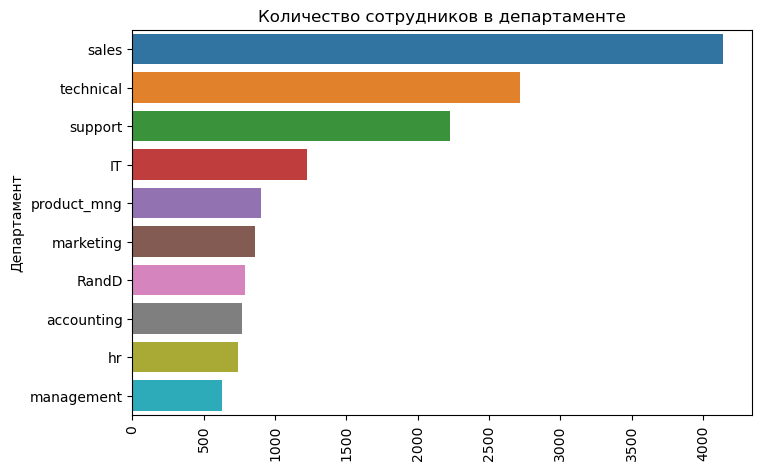

In [45]:
# hr_count = hr['department'].value_counts()
print(hr_count)

# Построим гистограмму
plt.figure(figsize=(8, 5))
sns.barplot(y = hr_count.index, x = hr_count.values)
plt.ylabel('Департамент')
plt.title('Количество сотрудников в департаменте')
plt.xticks(rotation=90)
plt.show()

## Распределение сотрудников по зарплатам

In [16]:
hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

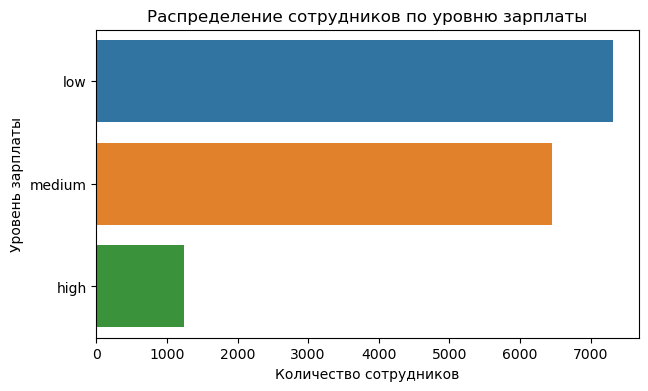

In [17]:
plt.figure(figsize=(7, 4))
sns.countplot(y='salary', data=hr)
plt.ylabel('Уровень зарплаты')
plt.xlabel('Количество сотрудников')
plt.title('Распределение сотрудников по уровню зарплаты')
plt.show()

## Pаспределение сотрудников по зарплатам в каждом департаменте по отдельности

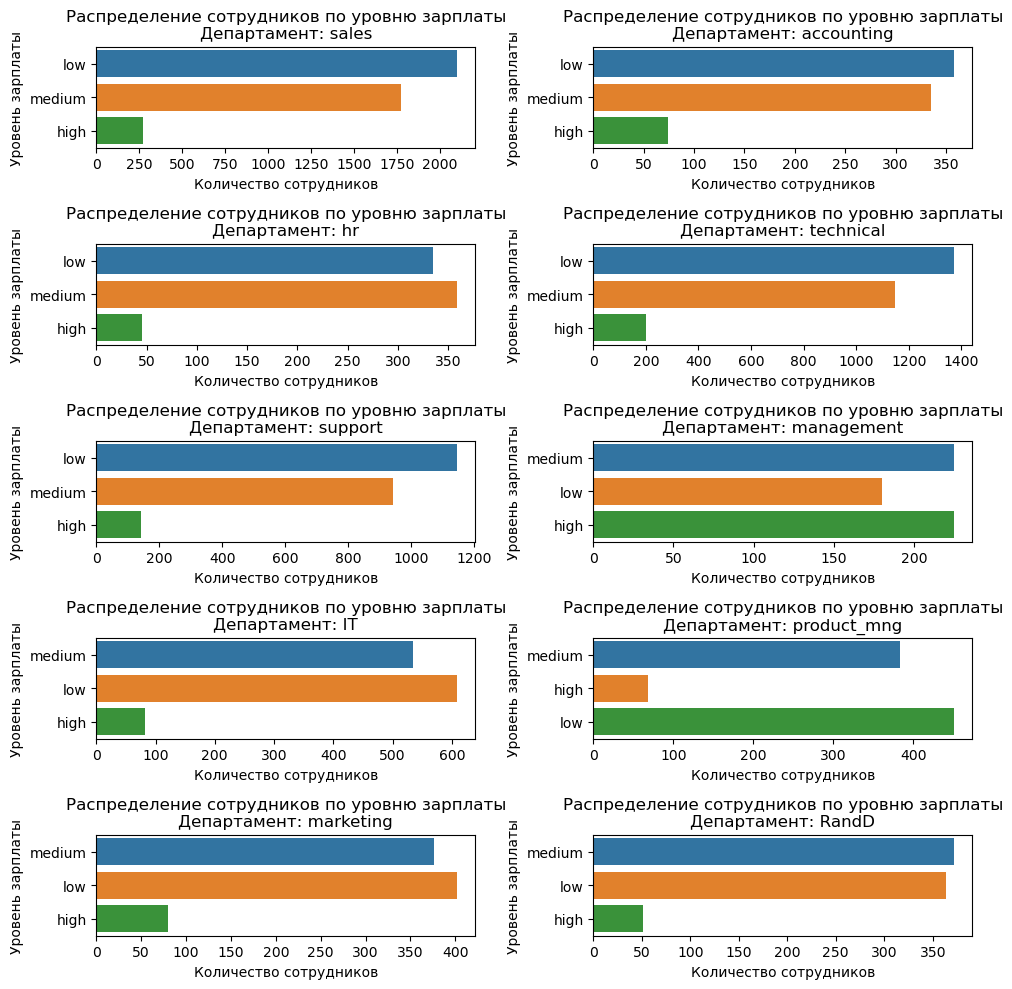

In [18]:
departments = hr['department'].unique()
# Выведем графики по каждому департаменту
num_departments = len(departments)
num_cols = 2
num_rows = (num_departments + num_cols - 1) // num_cols

plt.figure(figsize=(10, 10))
for i, department in enumerate(departments):
    plt.subplot(num_rows, num_cols, i+1)
    sns.countplot(y='salary', data=hr[hr['department'] == department])
    plt.ylabel('Уровень зарплаты')
    plt.xlabel('Количество сотрудников')
    plt.title('Распределение сотрудников по уровню зарплаты\nДепартамент: {}'.format(department))

plt.tight_layout()
plt.show()

## Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [20]:
from scipy.stats import ttest_ind

In [22]:
# Отфильтруем данные для сотрудников с высоким и низким окладом
high_salary_hours = hr[hr['salary'] == 'high']['average_montly_hours']
low_salary_hours = hr[hr['salary'] == 'low']['average_montly_hours']

# Проведение t-теста
t_stat, p_value = ttest_ind(high_salary_hours, low_salary_hours)

if p_value < 0.05:
    print('Существует статистически значимая разница среднего количества часов на рабочем месте в месяц между сотрудниками с высоким и низким окладом.')
else:
    print('Нет статистически значимой разницы среднего количества часов на рабочем месте в месяц между сотрудниками с высоким и низким окладом.')
print('P-value:', p_value)

Нет статистически значимой разницы среднего количества часов на рабочем месте в месяц между сотрудниками с высоким и низким окладом.
P-value: 0.4661023478267259


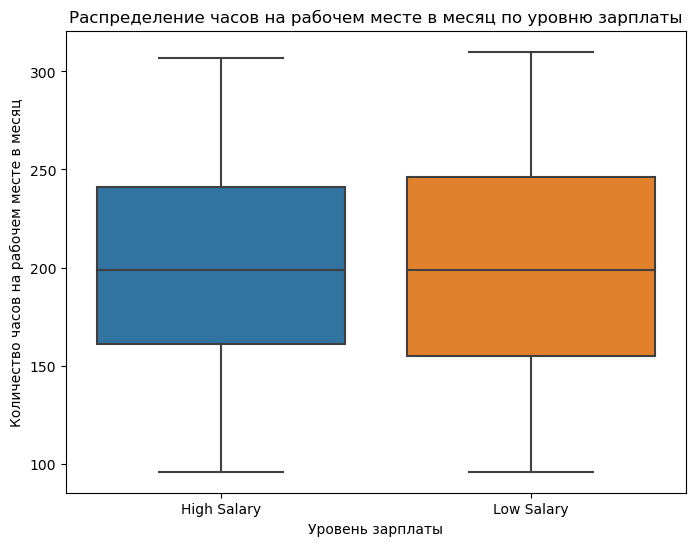

In [23]:
# Создание датафрейма для графика
data = pd.DataFrame({'High Salary': high_salary_hours, 'Low Salary': low_salary_hours})

# Построение графика
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество часов на рабочем месте в месяц')
plt.title('Распределение часов на рабочем месте в месяц по уровню зарплаты')
plt.show()

## Рассчитаем следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [24]:
# Рассчитаем долю сотрудников с повышением за последние 5 лет среди уволившихся
hr_left = hr[hr['left'] == 1]
left = hr_left['promotion_last_5years'].value_counts()
left_ratio = left[1] / hr_left.shape[0]

# Рассчитаем долю сотрудников с повышением за последние 5 лет среди неуволившихся
hr_not_left = hr[hr['left'] == 0]
not_left = hr_not_left['promotion_last_5years'].value_counts()
not_left_ratio = not_left[1] / hr_not_left.shape[0]

print('Доля сотрудников с повышением за последние 5 лет среди уволившихся:', left_ratio.round(3))
print('Доля сотрудников с повышением за последние 5 лет среди неуволившихся:', not_left_ratio.round(3))

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.005
Доля сотрудников с повышением за последние 5 лет среди неуволившихся: 0.026


Среди уволившихся сотрудников практически отсутствуют сотрудники с повышением за последние 5 лет

In [30]:
# Рассчитаем среднюю степень удовлетворенности
print('Средняя степень удовлетворенности среди уволившихся сотрудников:', hr_left['satisfaction_level'].mean())
print('Средняя степень удовлетворенности среди неуволившихся сотрудников:', hr_not_left['satisfaction_level'].mean())

Средняя степень удовлетворенности среди уволившихся сотрудников: 0.44009801176140917
Средняя степень удовлетворенности среди неуволившихся сотрудников: 0.666809590479516


Среди уволившихся сотрудников средняя степень удовлетворенности ниже

In [32]:
# Рассчитаем среднее количество проектов среди уволившихся и неуволившихся сотрудников
print('Среднее количество проектов среди уволившихся сотрудников:',  hr_left['number_project'].mean())
print('Среднее количество проектов среди неуволившихся сотрудников:', hr_not_left['number_project'].mean())

Среднее количество проектов среди уволившихся сотрудников: 3.8555026603192384
Среднее количество проектов среди неуволившихся сотрудников: 3.786664333216661


Среднее количество проектов при округлении до целого среди уволившихся и неуволившихся сотрудников одинаковое и равно 4

## Разделим данные на тестовую и обучающую выборки

Построим модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценим качество модели на тестовой выборке

In [61]:
# Загружаем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [62]:
# Создадим новый датафрейм, исключим из рассмотрения столбцы 'left', 'department' и 'salary'
X = hr.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
X.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0


In [63]:
# Определим целевую переменную
y = hr['left']
y.head(3)

0    1
1    1
2    1
Name: left, dtype: int64

In [64]:
# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [65]:
# Приведение типа данных столбцов в тестовой и обучающей выборке
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [66]:
# Создание и обучение модели LDA
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [67]:
# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
# Смотрим разницу факта и прогноза

result = pd.concat([pd.Series(y_test).reset_index(drop=True), pd.Series(lda.predict(X_test)).reset_index(drop=True)], axis=1)
result.columns = ['Фактические значения', 'Предсказанные значения']

print(result)

      Фактические значения  Предсказанные значения
0                        0                       0
1                        0                       0
2                        0                       0
3                        1                       0
4                        0                       0
...                    ...                     ...
2995                     0                       0
2996                     0                       0
2997                     0                       0
2998                     0                       0
2999                     1                       0

[3000 rows x 2 columns]


In [68]:
# Расчет точности - отношение верных прогнозов к общему количеству позиций
accuracy_score(y_test, lda.predict(X_test))

0.7533333333333333

Значение точности 0.7533 говорит о том, что модель имеет довольно высокую способность корректно классифицировать увольнение сотрудника на основе степени их удовлетворенности.
В 75,33% случаев модель LDA верно определила, уволился ли сотрудник или нет на основе доступных факторов, которые были использованы для обучения модели.